In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:\\Case Study\\Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


###  Converting date-time format

In [6]:
#for column 'Request time stamp'
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],errors='ignore', dayfirst=True)

In [7]:
#for column 'Drop timestamp'
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='ignore', dayfirst=True)
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [8]:
# Extracting new columns from request_timestamp and Drop_timestamp
df["PickupP_time"] = df["Request timestamp"].dt.time
df["Drop_time"] = df["Drop timestamp"].dt.time
df['Request_day'] = df["Request timestamp"].dt.day_name()
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,PickupP_time,Drop_time,Request_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday


In [9]:
## New Column-Request hour
df["Request_hour"] = df["Request timestamp"].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,PickupP_time,Drop_time,Request_day,Request_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday,8


In [10]:
#Extracting Parts of the day
df['Day_part'] = pd.cut(df['Request_hour'],[0,4,8,12,16,20,24],labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,PickupP_time,Drop_time,Request_day,Request_hour,Day_part
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Monday,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Tuesday,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday,8,Early Morning


In [11]:
#Distributing Uber dataframe into 2dataframes i.e city and airport from column'Pickup point'
uber_city = df.loc[df['Pickup point'] == 'City']
uber_airport = df.loc[df['Pickup point'] == 'Airport']

In [12]:
uber_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,PickupP_time,Drop_time,Request_day,Request_hour,Day_part
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday,9,Morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday,8,Early Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17:57:27,18:50:51,Friday,17,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,06:46:00,07:25:00,Monday,6,Early Morning
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12:30:00,12:57:00,Tuesday,12,Morning


In [13]:
uber_airport.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,PickupP_time,Drop_time,Request_day,Request_hour,Day_part
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Monday,17,Evening
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Tuesday,21,Night
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21:57:28,22:28:59,Wednesday,21,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,06:15:32,07:13:15,Thursday,6,Early Morning


### UBER STATUS FROM CITY TO AIRPORT (DAY PART WISE)

In [14]:
uber_city = df.groupby(["Status", "Day_part"]).count()['Request id'].unstack().fillna(0)


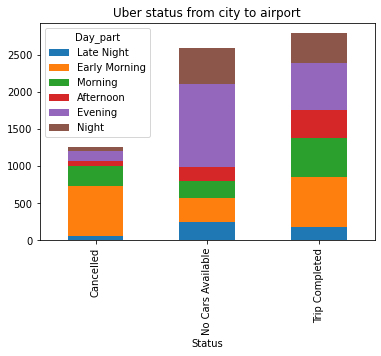

In [15]:
uber_city.plot(kind='bar', stacked=True, align='center', title='Uber status from city to airport')
plt.show()


In [16]:
uber_airport = df.groupby(["Status", "Day_part"]).count()['Request id'].unstack().fillna(0)

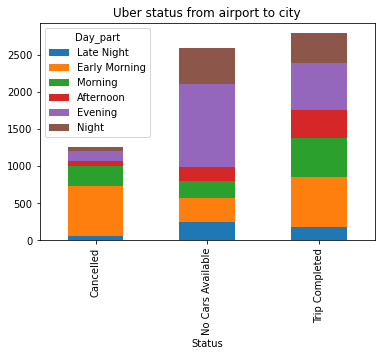

In [17]:
uber_airport.plot(kind='bar', stacked=True, align='center', title='Uber status from airport to city')
plt.show()

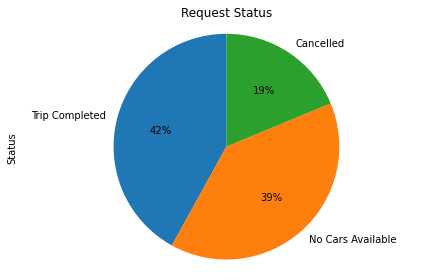

In [18]:
### Ploting pie Chart
df.Status.value_counts().plot(kind = "pie",startangle= 90,radius= 1.0,autopct="%0.0f%%")
plt.title("Request Status")
plt.tight_layout()
plt.axis("equal")
plt.show()

In [19]:
#Identifying Supply and Demand GAP from City to Airport
#DAY_PART(PART OF THE DAY)

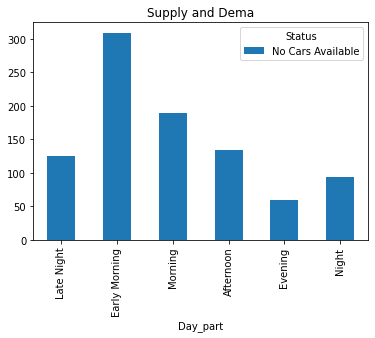

In [28]:
#Status-1 --> No Cars Available

uber_gap =  df[df['Status'] == 'No Cars Available']

uber_gap_citytoairport = uber_gap.loc[uber_gap['Pickup point'] == 'City']

uber_gap_citytoairport = uber_gap_citytoairport.groupby(['Day_part', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_gap_citytoairport.plot(kind='bar', stacked=True, title = 'Supply and Dema')
plt.show()

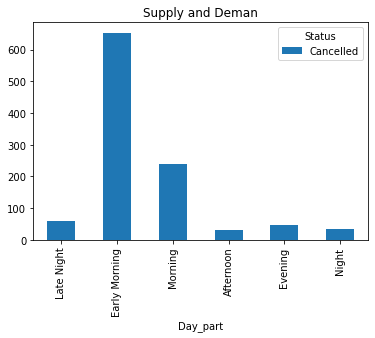

In [25]:
#Status-2 --> Cancelled

uber_gap =  df[df['Status'] == 'Cancelled']

uber_gap_citytoairport = uber_gap.loc[uber_gap['Pickup point'] == 'City']

uber_gap_citytoairport = uber_gap_citytoairport.groupby(['Day_part', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_gap_citytoairport.plot(kind='bar', stacked=True, title = 'Supply and Deman')
plt.show()

In [29]:
#Identifying Supply and Demand GAP from Airport to City
#DAY_PART(PART OF THE DAY)

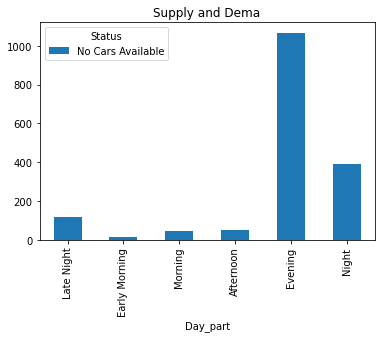

In [30]:
#Status-1 --> No Cars Available

uber_gap =  df[df['Status'] == 'No Cars Available']

uber_gap_airporttocity = uber_gap.loc[uber_gap['Pickup point'] == 'Airport']

uber_gap_airporttocity = uber_gap_airporttocity.groupby(['Day_part', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_gap_airporttocity.plot(kind='bar', stacked=True, title = 'Supply and Dema')
plt.show()

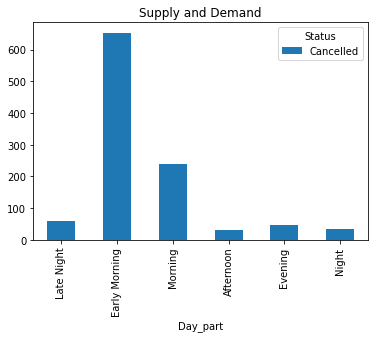

In [32]:
#Status-2 --> Cancelled

uber_gap = df[df['Status'] == 'Cancelled']

uber_gap_airporttocity = uber_gap.loc[uber_gap['Pickup point'] == 'City']

uber_gap_airporttocity = uber_gap_airporttocity.groupby(['Day_part', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_gap_airporttocity.plot(kind='bar', stacked=True, title = 'Supply and Demand')
plt.show()

In [33]:
#Identifying Supply and Demand GAP from Airport-City and City-Airport
#REQUEST_DAY

<AxesSubplot:title={'center':'Supply and Deman'}, xlabel='Request_day'>

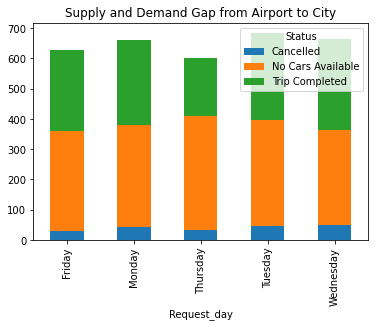

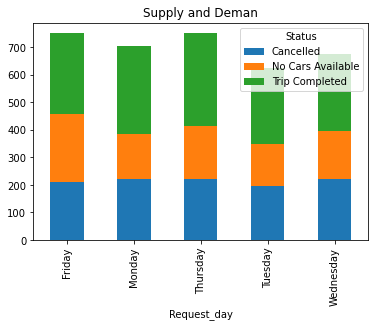

In [35]:
uber_sd_airporttocity = df[df['Pickup point'] != 'City']

uber_sd_airporttocity = uber_sd_airporttocity.groupby(['Request_day', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_sd_airporttocity.plot(kind='bar', stacked=True, title = 'Supply and Demand Gap from Airport to City')


uber_sd_citytoairport = df[df['Pickup point'] != 'Airport']

uber_sd_citytoairport = uber_sd_citytoairport.groupby(['Request_day', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_sd_citytoairport.plot(kind='bar', stacked=True, title = 'Supply and Deman')

NOW Finding Gap between supply and demand without plotting graphs

In [36]:
df.groupby(['Day_part']).count()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,PickupP_time,Drop_time,Request_day,Request_hour
Day_part,,,,,,,,,,
Late Night,479,479,236,479,479,174,479,174,479,479
Early Morning,1672,1672,1349,1672,1672,681,1672,681,1672,1672
Morning,1029,1029,796,1029,1029,525,1029,525,1029,1029
Afternoon,626,626,442,626,626,370,626,370,626,626
Evening,1893,1893,766,1893,1893,642,1893,642,1893,1893
Night,947,947,463,947,947,399,947,399,947,947


In [37]:
df.groupby(['Status', 'Day_part']).count()

Request id  Pickup point  Driver id  \
Status            Day_part                                             
Cancelled         Late Night             62            62         62   
                  Early Morning         668           668        668   
                  Morning               271           271        271   
                  Afternoon              72            72         72   
                  Evening               124           124        124   
                  Night                  64            64         64   
No Cars Available Late Night            243           243          0   
                  Early Morning         323           323          0   
                  Morning               233           233          0   
                  Afternoon             184           184          0   
                  Evening              1127          1127          0   
                  Night                 484           484          0   
Trip Completed    Late Night            174           174        174   
                  Early Morning         681           681        681   
                  Morning               525           525        525   
                  Afternoon             370           370        370   
                  Evening               642           642        642   
                  Night                 399           399        399   

                                 Request timestamp  Drop timestamp  \
Status            Day_part                                           
Cancelled         Late Night                    62               0   
                  Early Morning                668               0   
                  Morning                      271               0   
                  Afternoon                     72               0   
                  Evening                      124               0   
                  Night                         64               0   
No Cars Available Late Night                   243               0   
                  Early Morning                323               0   
                  Morning                      233               0   
                  Afternoon                    184               0   
                  Evening                     1127               0   
                  Night                        484               0   
Trip Completed    Late Night                   174             174   
                  Early Morning                681             681   
                  Morning                      525             525   
                  Afternoon                    370             370   
                  Evening                      642             642   
                  Night                        399             399   

                                 PickupP_time  Drop_time  Request_day  \
Status            Day_part                                              
Cancelled         Late Night               62          0           62   
                  Early Morning           668          0          668   
                  Morning                 271          0          271   
                  Afternoon                72          0           72   
                  Evening                 124          0          124   
                  Night                    64          0           64   
No Cars Available Late Night              243          0          243   
                  Early Morning           323          0          323   
                  Morning                 233          0          233   
                  Afternoon               184          0          184   
                  Evening                1127          0         1127   
                  Night                   484          0          484   
Trip Completed    Late Night              174        174          174   
                  Early Morning           681        681          681   
                  Morni

In [38]:
pd.value_counts(df.Day_part)


Evening          1893
Early Morning    1672
Morning          1029
Night             947
Afternoon         626
Late Night        479
Name: Day_part, dtype: int64

In [39]:
uber2 = df[['Status', 'Day_part']]
uber2

,Status,Day_part
0,Trip Completed,Morning
1,Trip Completed,Evening
2,Trip Completed,Morning
3,Trip Completed,Night
4,Trip Completed,Early Morning
...,...,...
6740,No Cars Available,Night
6741,No Cars Available,Night
6742,No Cars Available,Night
6743,No Cars Available,Night


In [40]:
uber3 = uber2.groupby('Day_part').count()
uber3

,Status
Day_part,
Late Night,479
Early Morning,1672
Morning,1029
Afternoon,626
Evening,1893
Night,947


In [41]:
uber3.columns=['Demand']
uber3

,Demand
Day_part,
Late Night,479
Early Morning,1672
Morning,1029
Afternoon,626
Evening,1893
Night,947


In [42]:
uber4 = uber2[uber2['Status'] == 'Trip Completed']
uber4.head()

,Status,Day_part
0,Trip Completed,Morning
1,Trip Completed,Evening
2,Trip Completed,Morning
3,Trip Completed,Night
4,Trip Completed,Early Morning


In [43]:
uber3['Supply']=uber4.groupby('Day_part').count()
uber3

,Demand,Supply
Day_part,,
Late Night,479,174
Early Morning,1672,681
Morning,1029,525
Afternoon,626,370
Evening,1893,642
Night,947,399


In [44]:
GAP = uber3['Demand']-uber3['Supply']
GAP

Day_part
Late Night        305
Early Morning     991
Morning           504
Afternoon         256
Evening          1251
Night             548
dtype: int64

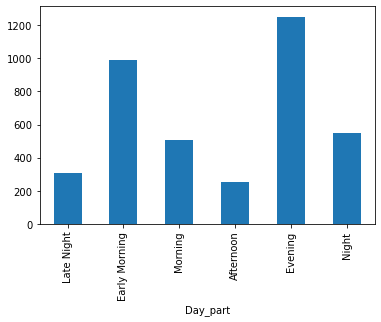

In [46]:
GAP.plot(kind='bar')
plt.show()